In [58]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Reading Files

In [63]:
df = pd.read_csv("heart.csv")
df2 = pd.read_csv("ss.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(df)

303

Checking for type of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looking for Null values

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df['output'].unique()

array([1, 0], dtype=int64)

In [7]:
len(df[df['sex']==1])

207

In [8]:
df.corr()['output'].sort_values()[:-1]

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
Name: output, dtype: float64

Number of unique values

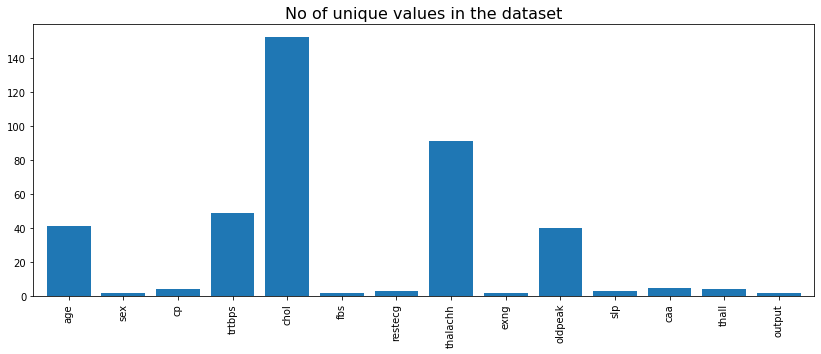

In [9]:
plt.figure(figsize = (14,5))
df.nunique().plot(kind='bar', width=0.8)
plt.title("No of unique values in the dataset", size=16)
plt.show()

Making a heatmap to see correlation between columns

<AxesSubplot:>

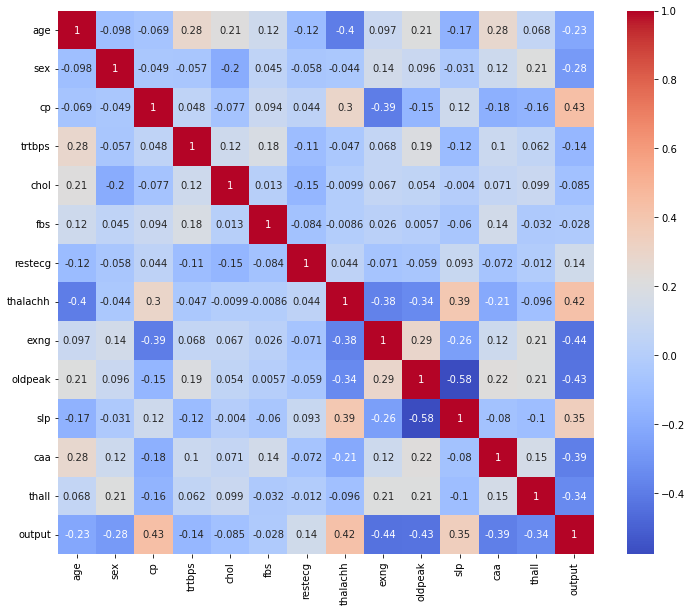

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='output', ylabel='Count'>

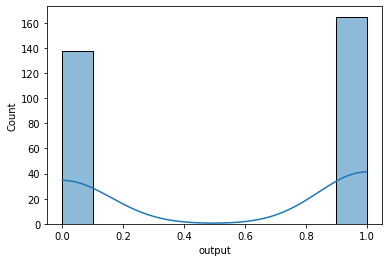

In [11]:
sns.histplot(data=df,x='output',kde=True)

<AxesSubplot:xlabel='cp', ylabel='count'>

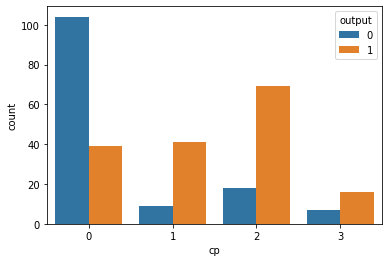

In [12]:
sns.countplot(data=df , x = 'cp', hue ='output')

Dividing the data into training and testing 


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('output',axis=1)
y = df['output']

In [15]:
df['thall'].nunique()

4

Changing categorical values of data

In [16]:
X_dummies = pd.get_dummies(data=X,columns=['sex','cp','fbs','restecg','exng','slp','caa','thall'] , drop_first=True)

In [17]:
X_dummies.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(y_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(fit_intercept=True, random_state=42)

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [25]:
lr_pred = lr.predict(X_test)

As we can see LogisticRegression gives 84% score on our testing Data

In [26]:
lr.score(X_test,y_test)

0.8461538461538461

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [28]:
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(f1_score(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



[[33  8]
 [ 6 44]]


0.8627450980392156


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
lr_accuracies = cross_val_score(lr,X_test,y_test, cv = 41)
print(lr_accuracies.mean())

0.8252032520325202


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [33]:
knn_pred = knn.predict(X_test)

After using K-nearest neighbour we can see that out score is 86% 

In [34]:
knn.score(X_test,y_test)

0.8681318681318682

In [35]:
Accuracy = []
for i in range(1,41):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies = cross_val_score(knn , X_test , y_test , cv = 41)
    knn_accuracy_i = knn_accuracies.mean()
    Accuracy.append(knn_accuracy_i)

In [36]:
knn_df = pd.DataFrame({'Neighbours': np.arange(1,41) , 'Accuracy': Accuracy})

<AxesSubplot:xlabel='Neighbours', ylabel='Accuracy'>

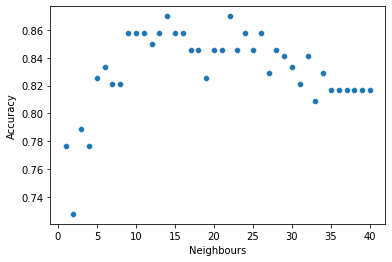

In [37]:
sns.scatterplot(data = knn_df, x = 'Neighbours',y = 'Accuracy')

In [38]:
Accuracy2 = []
for i in range(1,41):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies = knn.score(X_test,y_test)
    Accuracy2.append(knn_accuracies)

In [39]:
knn_df2 = pd.DataFrame({'Neighbours': np.arange(1,41) , 'Accuracy': Accuracy2})

<AxesSubplot:xlabel='Neighbours', ylabel='Accuracy'>

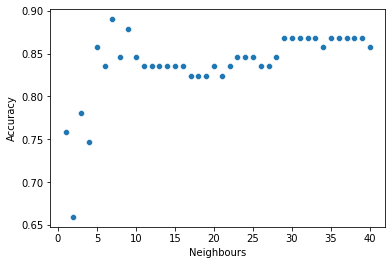

In [40]:
sns.scatterplot(data = knn_df2, x = 'Neighbours',y = 'Accuracy')

In [41]:
knn_df[knn_df['Accuracy']==knn_df['Accuracy'].max()]

,Neighbours,Accuracy
13,14,0.869919
21,22,0.869919


In [42]:
knn = KNeighborsClassifier(14)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[34  7]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [43]:
knn_accuracies = cross_val_score(knn, X_test, y_test, cv = 41)
print(knn_accuracies.mean())

0.8699186991869918


As You can see our KNN model gives an aprox 87% of accuracies

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
X_train.shape

(212, 22)

In [46]:
model = keras.Sequential([
    keras.layers.Dense(22, input_shape=(22,), activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
               metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 4s 6ms/step - loss: 0.7122 - accuracy: 0.5519
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.6085
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6349 - accuracy: 0.6415
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6009 - accuracy: 0.6651
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5704 - accuracy: 0.6934
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.7453
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5160 - accuracy: 0.7877
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4926 - accuracy: 0.8208
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4712 - accuracy: 0.8302
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4515 - accuracy: 0.8302
Epoch 11/50
7/7 [======================

As we can see using ANN gives 94% accuracy

In [50]:
X_train.shape

(212, 22)

Now let's test for external Input

In [64]:
dd = df2.drop('output',axis=1)